In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("labeling_df.csv")

In [3]:
df.head()

,year,month,day,user_name,favorite_count,retweet_count,text,user_location_ab,word_count,char_count,average_word_len,polarity
0,2017,3,11,ADub,0,16427,RT @GeorgeTakei: The GOP wants to ensure the m...,SK,25,139,4.600000,-0.150
1,2017,6,12,Annapolis NDP,1,0,Urgent-health care planning must be based on a...,NS,16,115,6.250000,0.000
2,2017,6,21,Lethbridge living,1,0,This research project is focused on making pri...,AB,13,107,7.307692,0.425
3,2017,6,14,THĒ RÅÏŃ MÅÑ ☔️,0,40988,RT @SenSanders: BREAKING: Senate Republicans j...,AB,19,140,6.421053,0.000
4,2017,6,8,Steven Holland,0,27,RT @AndreaHorwath: Simply appalling. We have t...,ON,27,148,4.518519,-0.350


In [4]:
df1 = df.drop(['year','month','day','user_name','favorite_count','retweet_count','user_location_ab','word_count','char_count','average_word_len'],axis=1)

In [5]:
df1.head()

,text,polarity
0,RT @GeorgeTakei: The GOP wants to ensure the m...,-0.150
1,Urgent-health care planning must be based on a...,0.000
2,This research project is focused on making pri...,0.425
3,RT @SenSanders: BREAKING: Senate Republicans j...,0.000
4,RT @AndreaHorwath: Simply appalling. We have t...,-0.350


In [6]:
df1[sentiment]= [3 for df1.polarity == 1]

SyntaxError: invalid syntax (<ipython-input-6-61ac5a1d432e>, line 1)

In [7]:
df1.head(4)

,text,polarity
0,RT @GeorgeTakei: The GOP wants to ensure the m...,-0.150
1,Urgent-health care planning must be based on a...,0.000
2,This research project is focused on making pri...,0.425
3,RT @SenSanders: BREAKING: Senate Republicans j...,0.000


In [8]:
df1['sentiment'] = pd.cut(df1.polarity,
                         bins=[-1,-0.5,-0.1,0.1,0.5,1],
                         labels=[0,1,2,3,4])

In [9]:
df1.head()

,text,polarity,sentiment
0,RT @GeorgeTakei: The GOP wants to ensure the m...,-0.150,1
1,Urgent-health care planning must be based on a...,0.000,2
2,This research project is focused on making pri...,0.425,3
3,RT @SenSanders: BREAKING: Senate Republicans j...,0.000,2
4,RT @AndreaHorwath: Simply appalling. We have t...,-0.350,1


In [10]:
neg_phrases = df1[df1.sentiment == 0]

In [11]:
neg_words = []
for t in neg_phrases.text:
    neg_words.append(t)
neg_words[:4]

['RT @JewRicans: Republican #trumpcare healthcare plan is to #masa Make America Sick Again #TheResistance #p2 https://t.co/8n6V9sXSXV',
 "I'm sorry if i did something wrong. https://t.co/OVDUfXe8xR",
 "RT @Tom_Parkin_: Too bad Trump didn't tell Justin to  increase healthcare, childcare or housing spending. https://t.co/2ifyfT9uPn",
 'RT @washingtonpost: They are poor, sick and voted for Trump. What will happen to them without Obamacare? https://t.co/eaHFcr8mER']

In [12]:
neg_text = pd.Series(neg_words).str.cat(sep=" ")
neg_text[:100]

'RT @JewRicans: Republican #trumpcare healthcare plan is to #masa Make America Sick Again #TheResista'

In [13]:
for t in neg_phrases.text[:300]:
    if 'good' in t:
        print(t)

In [14]:
pos_phrases = df1[df1.sentiment == 4]
pos_words = []
for t in pos_phrases.text:
    pos_words.append(t)
pos_words[:4]

["RT @nowthisnews: This Democratic congressman had the perfect takedown of Paul Ryan and the GOP's health care plan https://t.co/j7JE4N62ec",
 'RT @SchlegelVillage: Thrilled to welcome Dr. Bob Bell, Deputy Minister of Health &amp; Long-Term Care to the Innovation Summit. #SVInnovates @O…',
 "RT @funder: Karen Handel denies climate science—thinks being gay is wrong—Anti-women's rights—Supports Trumpcare—She's perfect for GOP Cong…",
 'RT @sahilkapur: "We know this is not the best way to do health care," says @LindseyGrahamSC. "But it\'s the way we\'re having to do it."']

In [15]:
pos_text = pd.Series(pos_words).str.cat(sep=" ")
pos_text[:100]

"RT @nowthisnews: This Democratic congressman had the perfect takedown of Paul Ryan and the GOP's hea"

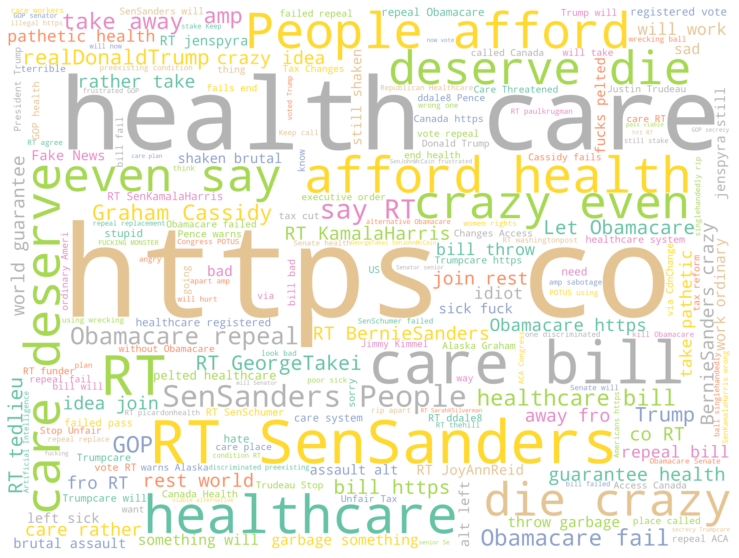

In [79]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=3600, height=2700).generate(neg_text)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud.recolor(colormap=plt.get_cmap('Set2')), interpolation='bilinear')
plt.axis("off")
plt.show()

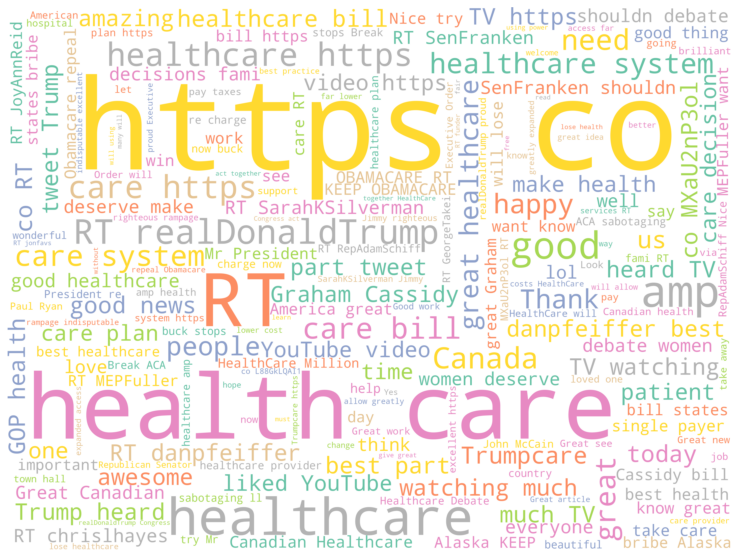

In [78]:
wordcloud = WordCloud(background_color="white",width=3600, height=2700).generate(pos_text)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud.recolor(colormap=plt.get_cmap('Set2')), interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
#Term Frequancy
# unigram

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,1))
cvector.fit(df1.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [44]:
len(cvector.get_feature_names())

209517

In [49]:
neg_matrix = cvector.transform(df1[df1.sentiment == 0].text)
sli_neg_matrix = cvector.transform(df1[df1.sentiment == 1].text)
neu_matrix = cvector.transform(df1[df1.sentiment == 2].text)
sli_pos_matrix = cvector.transform(df1[df1.sentiment == 3].text)
pos_matrix = cvector.transform(df1[df1.sentiment == 4].text)

In [46]:
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x:x[1], reverse = True)),columns = ['Terms','negative'])

In [50]:
neg_tf.head(10)

,Terms,negative
0,rt,7720
1,https,5946
2,the,5871
3,to,5738
4,co,5390
5,health,3478
6,care,3368
7,is,3255
8,it,2592
9,of,2551


In [52]:
neg_tf_df = neg_tf.set_index('Terms')
neg_tf_df.head(20)

,negative
Terms,
rt,7720
https,5946
the,5871
to,5738
co,5390
health,3478
care,3368
is,3255
it,2592


In [ ]:
#2 slight-negative

In [54]:
sli_neg_words = sli_neg_matrix.sum(axis=0)
sli_neg_words_freq = [(word, sli_neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
sli_neg_tf = pd.DataFrame(list(sorted(sli_neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','slight-negative'])
sli_neg_tf_df = sli_neg_tf.set_index('Terms')
sli_neg_tf_df.head(20)

,slight-negative
Terms,
rt,27713
the,22072
https,18931
to,18529
co,16708
health,13531
is,13108
care,12794
of,10493


In [ ]:
#3 neutral

In [56]:
neu_words = neu_matrix.sum(axis=0)
neu_words_freq = [(word, neu_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neu_words_tf = pd.DataFrame(list(sorted(neu_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','neutral'])
neu_words_tf_df = neu_words_tf.set_index('Terms')
neu_words_tf_df.head(20)

,neutral
Terms,
rt,109681
https,98768
co,88180
the,79574
to,69508
health,56746
care,54557
of,40243
healthcare,39146


In [ ]:
#4 slight positive

In [58]:
sli_pos_words = sli_pos_matrix.sum(axis=0)
sli_pos_words_freq = [(word, sli_pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
sli_pos_words_tf = pd.DataFrame(list(sorted(sli_pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','slight-positive'])
sli_pos_words_tf_df = sli_pos_words_tf.set_index('Terms')
sli_pos_words_tf_df.head(20)

,slight-positive
Terms,
rt,53913
https,43230
to,40621
the,39594
co,38540
health,30069
care,29363
healthcare,24023
is,22807


In [ ]:
#5 positive

In [60]:
pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')
pos_words_tf_df.head(20)

,positive
Terms,
https,8814
rt,8694
co,8120
the,7533
to,6982
healthcare,4415
care,4360
health,4335
for,3926


In [ ]:
# Total term frequence

In [61]:

term_freq_df = pd.concat([neg_tf_df,sli_neg_tf_df,neu_words_tf_df,sli_pos_words_tf_df,pos_words_tf_df],axis=1)

/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [62]:
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['slight-negative'] \
                                 + term_freq_df['neutral'] + term_freq_df['slight-positive'] \
                                 +  term_freq_df['positive'] 
term_freq_df.sort_values(by='total', ascending=False).head(20)

,negative,slight-negative,neutral,slight-positive,positive,total
rt,7720,27713,109681,53913,8694,207721
https,5946,18931,98768,43230,8814,175689
co,5390,16708,88180,38540,8120,156938
the,5871,22072,79574,39594,7533,154644
to,5738,18529,69508,40621,6982,141378
health,3478,13531,56746,30069,4335,108159
care,3368,12794,54557,29363,4360,104442
of,2551,10493,40243,21457,3669,78413
healthcare,2072,8316,39146,24023,4415,77972
is,3255,13108,34327,22807,3799,77296


Text(0.5, 1.0, 'Top 500 phrases in healthcare')

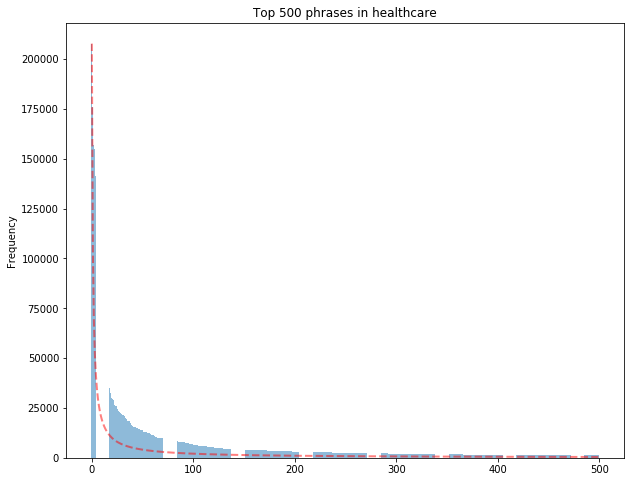

In [63]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 phrases in healthcare')


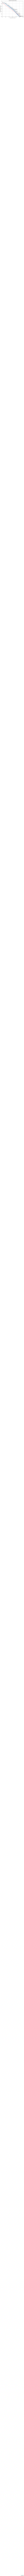

In [64]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for phrases tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [69]:

from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(df1.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [71]:
neg_matrix = cvec.transform(df1[df1.sentiment == 0].text)
sli_neg_matrix = cvec.transform(df1[df1.sentiment == 1].text)
neu_matrix = cvec.transform(df1[df1.sentiment == 2].text)
sli_pos_matrix = cvec.transform(df1[df1.sentiment == 3].text)
pos_matrix = cvec.transform(df1[df1.sentiment == 4].text)

neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x:x[1], reverse = True)),columns = ['Terms','negative'])

neg_tf_df = neg_tf.set_index('Terms')

sli_neg_words = sli_neg_matrix.sum(axis=0)
sli_neg_words_freq = [(word, sli_neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
sli_neg_tf = pd.DataFrame(list(sorted(sli_neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','slight-negative'])
sli_neg_tf_df = sli_neg_tf.set_index('Terms')

neu_words = neu_matrix.sum(axis=0)
neu_words_freq = [(word, neu_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neu_words_tf = pd.DataFrame(list(sorted(neu_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','neutral'])
neu_words_tf_df = neu_words_tf.set_index('Terms')

sli_pos_words = sli_pos_matrix.sum(axis=0)
sli_pos_words_freq = [(word, sli_pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
sli_pos_words_tf = pd.DataFrame(list(sorted(sli_pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','slight-positive'])
sli_pos_words_tf_df = sli_pos_words_tf.set_index('Terms')

pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')

term_freq_df = pd.concat([neg_tf_df,sli_neg_tf_df,neu_words_tf_df,sli_pos_words_tf_df,pos_words_tf_df],axis=1)

term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['slight-negative'] \
                                 + term_freq_df['neutral'] + term_freq_df['slight-positive'] \
                                 +  term_freq_df['positive'] 
term_freq_df.sort_values(by='total', ascending=False).head(20)

/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,negative,slight-negative,neutral,slight-positive,positive,total
rt,7720,27713,109681,53913,8694,207721
https,5946,18931,98768,43230,8814,175689
health,3478,13531,56746,30069,4335,108159
care,3368,12794,54557,29363,4360,104442
healthcare,2072,8316,39146,24023,4415,77972
obamacare,1616,4446,18258,7225,1103,32648
amp,818,3452,14869,8261,1338,28738
trump,1253,4227,13847,5879,1094,26300
gop,779,3566,12873,5338,829,23385
people,1153,3611,10099,6047,705,21615


Text(0.5, 1.0, 'Top 50 tokens in negative healthcare')

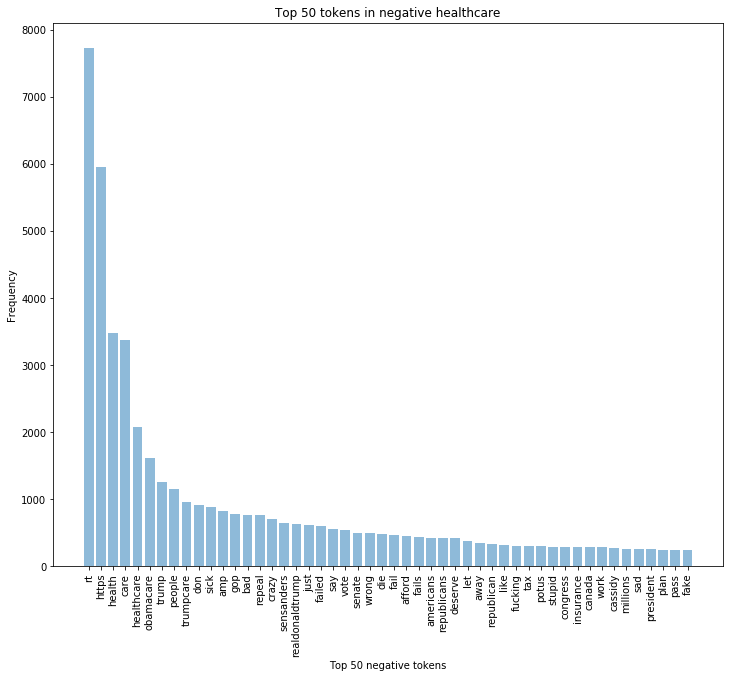

In [72]:

y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative healthcare')


Text(0.5, 1.0, 'Top 50 tokens in positive healthcare')

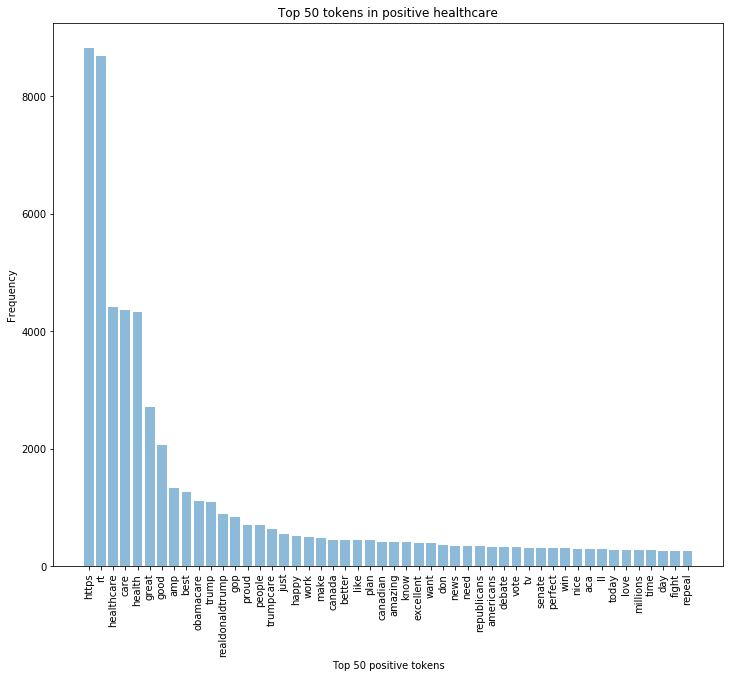

In [80]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive healthcare')


In [ ]:
#Supervised Machine Learning Models

In [ ]:
#1. bulid train and test datasets

In [81]:
phrase = np.array(df1['text'])
sentiments = np.array(df1['sentiment'])

from sklearn.model_selection import train_test_split    
phrase_train, phrase_test, sentiments_train, sentiments_test = train_test_split(phrase, sentiments, test_size=0.2, random_state=4)

In [ ]:
#2.  Implementation of CountVectorizer & TF-IDF

In [82]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Build Bag-Of-Words on train phrases
cv = CountVectorizer(stop_words='english',max_features=10000)
cv_train_features = cv.fit_transform(phrase_train)

In [84]:


# build TFIDF features on train reviews
tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,1),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(phrase_train)



In [85]:


# transform test reviews into features
cv_test_features = cv.transform(phrase_test)
tv_test_features = tv.transform(phrase_test)



In [86]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (235644, 10000)  Test features shape: (58912, 10000)
TFIDF model:> Train features shape: (235644, 180306)  Test features shape: (58912, 180306)
